In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_01 = pd.read_csv('country-wise-average.csv')
df_02 = pd.read_csv('malnutrition-estimates.csv')

In [4]:
df_01.head()

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0.0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2.0,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2.0,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1.0,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2.0,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [84]:
df_02.head()

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
0,0,AFG,AFGHANISTAN,1997,1997,0,1.0,1.0,1.0,"4,846",NaN,18.2,6.5,53.2,44.9,Converted estimates,CIET International,Afghanistan 1997 multiple indicator baseline (...,MICS,3838.877
1,1,AFG,AFGHANISTAN,2004,2004,0,1.0,1.0,1.0,946,3.5,8.6,4.6,59.3,32.9,NaN,"Ministry of Public Health (Afghanistan), UNICE...",Summary report of the national nutrition surve...,NNS,4789.353
2,2,AFG,AFGHANISTAN,2013,2013,0,1.0,1.0,1.0,"44,26,469",4.0,9.5,5.3,40.4,24.6,NaN,"Ministry of Public Health, UNICEF and the Aga ...",Afghanistan National Nutrition Survey 2013.,SMART,5444.573
3,3,AFG,AFGHANISTAN,2018,2018,0,1.0,1.0,1.0,NaN,1.6,5.1,4.1,38.2,19.1,NaN,KIT Royal Tropical Institute,Afghanistan Health Survey 2018,Other,5601.443
4,4,ALB,ALBANIA,1996-98,1997,2,0.0,0.0,0.0,"7,642",NaN,8.1,9.5,20.4,7.1,Converted estimates,"Institute of Public Health, Food and Nutrition...",National study on nutrition in Albania. Instit...,Other,309.225


In [10]:
df_01.describe()

,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,152.000000,140.000000,150.000000,149.000000,151.000000,150.000000,152.000000
mean,1.427632,2.168650,6.599257,7.201638,25.814728,13.503047,4042.927052
std,0.967019,1.708939,4.481723,4.649144,14.686807,10.895839,13164.191927
min,0.000000,0.000000,0.000000,0.962500,1.000000,0.100000,1.000000
25%,1.000000,0.900000,3.262500,3.850000,13.485000,4.305000,241.765813
50%,1.000000,1.872500,5.710714,6.300000,24.160000,10.380000,981.233486
75%,2.000000,2.822727,8.740476,9.080000,36.564935,19.496875,3002.433080
max,3.000000,11.400000,23.650000,26.500000,57.600000,46.266667,123014.491000


In [18]:
df_01.shape

(152, 8)

In [11]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                152 non-null    object 
 1   Income Classification  152 non-null    float64
 2   Severe Wasting         140 non-null    float64
 3   Wasting                150 non-null    float64
 4   Overweight             149 non-null    float64
 5   Stunting               151 non-null    float64
 6   Underweight            150 non-null    float64
 7   U5 Population ('000s)  152 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


In [30]:
df_01.isna().any()

Country                  False
Income Classification    False
Severe Wasting            True
Wasting                   True
Overweight                True
Stunting                  True
Underweight               True
U5 Population ('000s)    False
dtype: bool

In [4]:
for column in df_01.columns:
    if (df_01[column].isna().sum() > 0):
        print(f'{column} nulls - {df_01[column].isna().sum()}')
        df_01[column] = df_01[column].fillna(df_01[column].mean())
df_01.isna().any()

Severe Wasting nulls - 12
Wasting nulls - 2
Overweight nulls - 3
Stunting nulls - 1
Underweight nulls - 2


Country                  False
Income Classification    False
Severe Wasting           False
Wasting                  False
Overweight               False
Stunting                 False
Underweight              False
U5 Population ('000s)    False
dtype: bool

In [5]:
for column in df_02.columns:
    if (df_02[column].isna().sum() > 0):
        print(f'{column} nulls - {df_02[column].isna().sum()}')
        #df_02[column] = df_02[column].fillna(df_02[column].mean())
df_02.isna().any()

Survey Sample (N) nulls - 63
Severe Wasting nulls - 228
Wasting nulls - 47
Overweight nulls - 136
Stunting nulls - 37
Underweight nulls - 22
Notes nulls - 597


Unnamed: 0               False
ISO code                 False
Country                  False
Survey Year              False
Year                     False
Income Classification    False
LDC                      False
LIFD                     False
LLDC or SID2             False
Survey Sample (N)         True
Severe Wasting            True
Wasting                   True
Overweight                True
Stunting                  True
Underweight               True
Notes                     True
Report Author            False
Source                   False
Short Source             False
U5 Population ('000s)    False
dtype: bool

In [4]:
df_01.rename(columns = {"U5 Population ('000s)":'UnderFivePopulation'}, inplace = True)
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                152 non-null    object 
 1   Income Classification  152 non-null    float64
 2   Severe Wasting         140 non-null    float64
 3   Wasting                150 non-null    float64
 4   Overweight             149 non-null    float64
 5   Stunting               151 non-null    float64
 6   Underweight            150 non-null    float64
 7   UnderFivePopulation    152 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


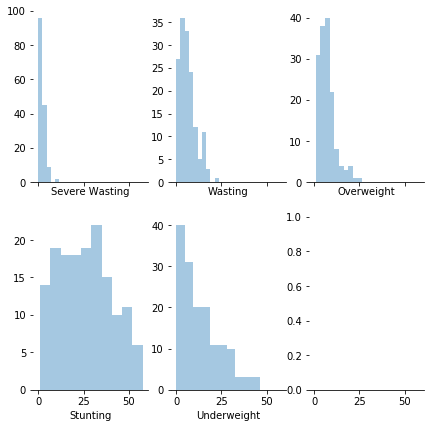

In [7]:
f, axes = plt.subplots(2, 3, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.distplot(df_01["Severe Wasting"].dropna(), kde=False, bins = 5, ax=axes[0,0]);
sns.distplot(df_01["Wasting"].dropna(), kde=False, bins = 10, ax=axes[0,1]);
sns.distplot(df_01["Overweight"].dropna(), kde=False, bins = 10, ax=axes[0,2]);
sns.distplot(df_01["Stunting"].dropna(), kde=False, bins = 10, ax=axes[1,0]);
sns.distplot(df_01["Underweight"].dropna(), kde=False, bins = 10, ax=axes[1,1]);
#sns.distplot(df_01["UnderFivePopulation"].dropna(), kde=False, bins = 20, ax=axes[1,2]);

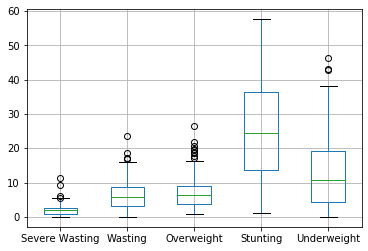

In [50]:
df_01.boxplot(column=['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight'])

In [54]:
df_01["Income Classification"].unique()

array([0., 2., 1., 3.])

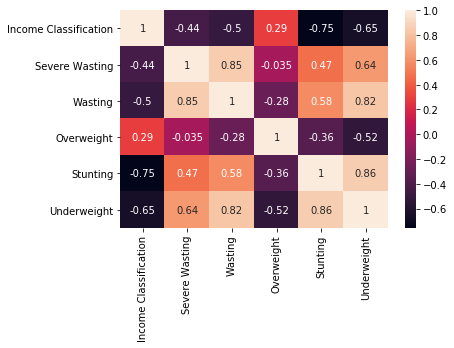

In [65]:
df = pd.DataFrame(df_01,columns=['Income Classification', 'Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight'])

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [94]:
df_01[df_01.Wasting == df_01.Wasting.max()]
#df_01[df_01.Overweight == df_01.Overweight.max()]

,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
124,SOUTH SUDAN,0.0,11.4,23.65,8.45,33.75,30.1,1459.2625


In [92]:
df_02[df_02.Country == "SOUTH SUDAN"]

,Unnamed: 0,ISO code,Country,Survey Year,Year,Income Classification,LDC,LIFD,LLDC or SID2,Survey Sample (N),Severe Wasting,Wasting,Overweight,Stunting,Underweight,Notes,Report Author,Source,Short Source,U5 Population ('000s)
733,733,SSD,SOUTH SUDAN,2006,2006,0,1.0,1.0,1.0,"13,29,786",12.9,24.6,10.9,36.2,32.5,NaN,Government of National Unity and Government of...,Sudan household health survey (SHHS) - 2006. K...,PAPFAM,1335.359
734,734,SSD,SOUTH SUDAN,2010,2010,0,1.0,1.0,1.0,"6,378",9.9,22.7,6.0,31.3,27.7,NaN,Ministry of Health and National Bureau of Stat...,South Sudan Household Survey 2010. Final Repor...,MICS,1583.166


In [179]:
source = df_02["Short Source"].groupby(df_02["Short Source"]).value_counts().sort_values(ascending = False).head()
source.values
source.index.get_level_values(0)
#len(source.values)

Index(['DHS', 'MICS', 'Other', 'Surveillance', 'NNS'], dtype='object', name='Short Source')

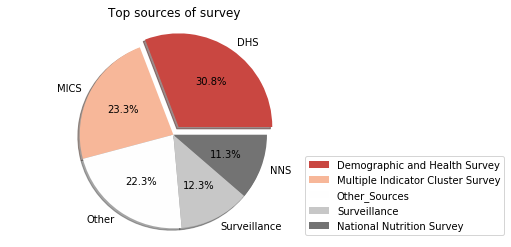

In [180]:
explode = [0 for _ in range(len(source.values))]
explode[0] = 0.1
legend_labels = ['Demographic and Health Survey', 'Multiple Indicator Cluster Survey' , 'Other_Sources', 'Surveillance', 'National Nutrition Survey']
plt.pie(source, labels = source.index.get_level_values(0), autopct='%1.1f%%', shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("RdGy", n_colors=5))
plt.title('Top sources of survey')
plt.axis('equal')
plt.legend(legend_labels, loc = "lower right", bbox_to_anchor=(1.5,0))
plt.show()

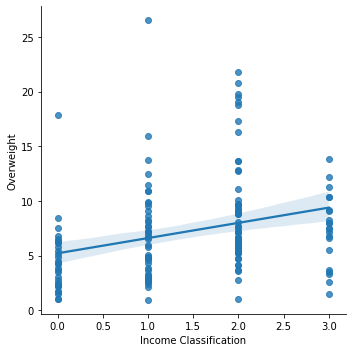

In [187]:
#plt.scatter(df_01["Income Classification"], df_01["Overweight"])
sns.lmplot(x="Income Classification", y="Overweight", data=df_01,fit_reg=True) 

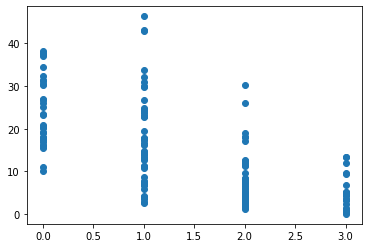

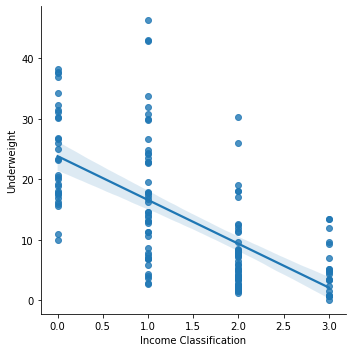

In [188]:
plt.scatter(df_01["Income Classification"], df_01["Underweight"])
sns.lmplot(x="Income Classification", y="Underweight", data=df_01,fit_reg=True) 

In [55]:
#fig, ax = plt.subplots(figsize=(15,7))
#df_01.groupby(["Income Classification"]).mean()['Overweight'].plot(ax=ax, kind = 'bar')

In [8]:
df_averages = df_01[['Income Classification', 'Overweight', 'Stunting', 'Underweight', 'Wasting', 'Severe Wasting']].copy()
df_averages

,Income Classification,Overweight,Stunting,Underweight,Wasting,Severe Wasting
0,0.0,5.125000,47.775000,30.375000,10.350000,3.033333
1,2.0,20.800000,24.160000,7.700000,7.760000,4.075000
2,2.0,12.833333,19.571429,7.342857,5.942857,2.733333
3,1.0,2.550000,42.633333,23.600000,6.933333,2.400000
4,2.0,11.125000,10.025000,2.600000,2.150000,0.200000
...,...,...,...,...,...,...
147,2.0,5.409524,16.957143,4.242857,4.333333,NaN
148,1.0,3.317647,34.922727,22.918182,8.661905,2.331250
149,0.0,4.842857,51.900000,37.785714,15.242857,5.300000
150,1.0,7.228571,48.137500,17.885714,5.542857,2.042857


In [9]:
rule = {0: 'Low Income', 1: 'Lower Middle Income', 2: 'Upper Middle Income', 3: 'High Income'}

df_averages['Income Classification'] = df_averages['Income Classification'].replace(rule)



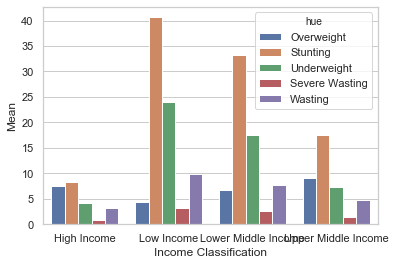

In [10]:
df_overweight = df_averages.groupby(["Income Classification"]).mean()['Overweight'].reset_index(name='Mean')
df_stunting = df_averages.groupby(["Income Classification"]).mean()['Stunting'].reset_index(name='Mean')
df_underweight = df_averages.groupby(["Income Classification"]).mean()['Underweight'].reset_index(name='Mean')
df_wasting = df_averages.groupby(["Income Classification"]).mean()['Wasting'].reset_index(name='Mean')
df_severewasting = df_averages.groupby(["Income Classification"]).mean()['Severe Wasting'].reset_index(name='Mean')
df_overweight['hue']= 'Overweight'
df_stunting['hue']= 'Stunting'
df_underweight['hue'] = 'Underweight'
df_wasting['hue'] = 'Wasting'
df_severewasting['hue'] = 'Severe Wasting'

result = pd.concat([df_overweight, df_stunting, df_underweight, df_severewasting, df_wasting])
sns.set(style="whitegrid")
sns.barplot(x="Income Classification",y='Mean',data=result, hue = 'hue')
plt.show()

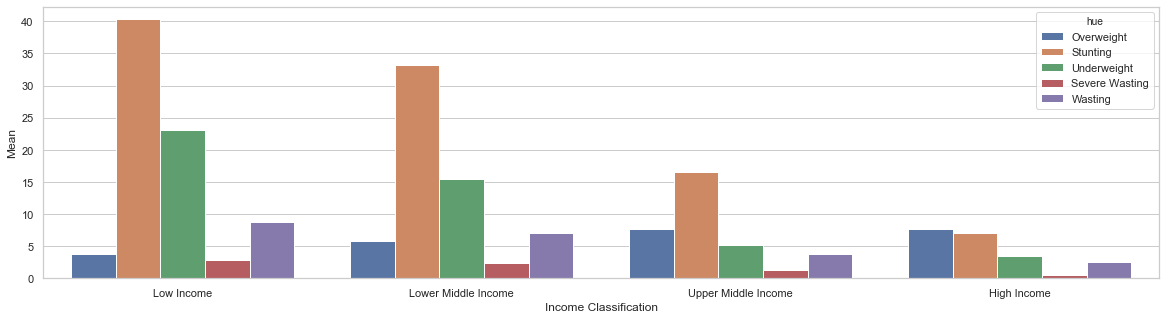

In [15]:
df_overweight = df_averages.groupby(["Income Classification"]).median()['Overweight'].reset_index(name='Mean')
df_stunting = df_averages.groupby(["Income Classification"]).median()['Stunting'].reset_index(name='Mean')
df_underweight = df_averages.groupby(["Income Classification"]).median()['Underweight'].reset_index(name='Mean')
df_wasting = df_averages.groupby(["Income Classification"]).median()['Wasting'].reset_index(name='Mean')
df_severewasting = df_averages.groupby(["Income Classification"]).median()['Severe Wasting'].reset_index(name='Mean')
df_overweight['hue']= 'Overweight'
df_stunting['hue']= 'Stunting'
df_underweight['hue'] = 'Underweight'
df_wasting['hue'] = 'Wasting'
df_severewasting['hue'] = 'Severe Wasting'

result = pd.concat([df_overweight, df_stunting, df_underweight, df_severewasting, df_wasting])
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Income Classification",y='Mean',data=result, hue = 'hue', order = ['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income'])
plt.show()

In [56]:
df_01.groupby(["Income Classification"]).mean()['Overweight']

Income Classification
0.0    4.441425
1.0    6.767270
2.0    9.060381
3.0    7.448086
Name: Overweight, dtype: float64

In [57]:
df_01.groupby(["Income Classification"]).median()['Overweight']

Income Classification
0.0    3.850000
1.0    5.869444
2.0    7.510714
3.0    7.500000
Name: Overweight, dtype: float64